<a href="https://colab.research.google.com/github/WalterPHD/Ai-Data/blob/main/BinaryIrisClassificationn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Loading Iris dataset
df = load_iris()

# Problem 1: Creating the DataFrame
Iris = pd.DataFrame(df['data'], columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
print(Iris.head())
#iris work

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [13]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
knn = KNeighborsClassifier(n_neighbors=3)


In [14]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [16]:
#category selection
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Step 2: Filter for only class 1 (versicolor) and class 2 (virginica)
mask = (y == 1) | (y == 2)
X = X[mask]
y = y[mask]

# Step 3: Extract features: sepal_length (index 0) and petal_length (index 2)
X = X[:, [0, 2]]  # sepal_length and petal_length

# Step 4: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Train k-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 6: Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.85


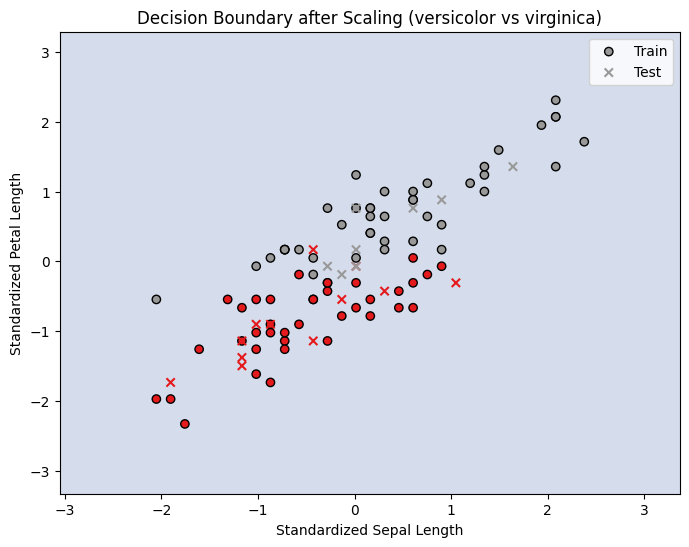

In [17]:
# visualizing
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predicting
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2, alpha=0.8)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k', label='Train', cmap=plt.cm.Set1)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, marker='x', label='Test', cmap=plt.cm.Set1)
plt.xlabel("Standardized Sepal Length")
plt.ylabel("Standardized Petal Length")
plt.title("Decision Boundary after Scaling (versicolor vs virginica)")
plt.legend()
plt.show()



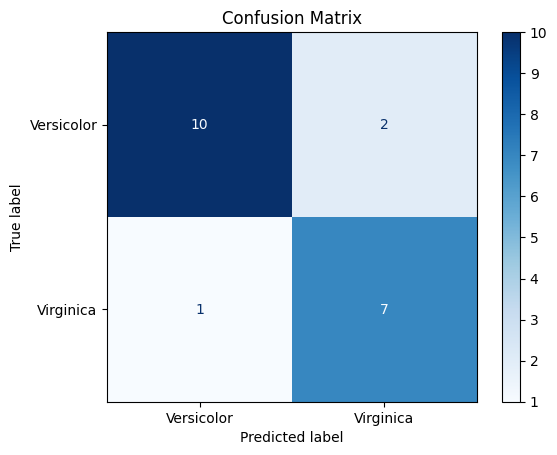

Classification Report:
              precision    recall  f1-score   support

  Versicolor       0.91      0.83      0.87        12
   Virginica       0.78      0.88      0.82         8

    accuracy                           0.85        20
   macro avg       0.84      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20

Accuracy : 0.85
Precision: 0.7777777777777778
Recall   : 0.875
F1 Score : 0.8235294117647058


In [18]:
# Use of Metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score, precision_score, recall_score, f1_score
)

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Filter for versicolor and virginica
mask = (y == 1) | (y == 2)
X = X[mask]
y = y[mask]

# Select features: sepal_length (0), petal_length (2)
X = X[:, [0, 2]]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train k-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Versicolor', 'Virginica'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Versicolor', 'Virginica']))

# Manual scores (optional)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=2))
print("Recall   :", recall_score(y_test, y_pred, pos_label=2))
print("F1 Score :", f1_score(y_test, y_pred, pos_label=2))


In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='決定領域', xlabel='横軸', ylabel='縦軸', target_names=['virgicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load and filter iris data (versicolor and virginica, two features)
iris = load_iris()
X = iris.data
y = iris.target
mask = (y == 1) | (y == 2)
X = X[mask][:, [0, 2]]  # sepal_length, petal_length
y = y[mask]

# Split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to test
models = {
    "k-NN": KNeighborsClassifier(n_neighbors=3),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {"No Scaling": {}, "With StandardScaler": {}}

# No Standardization
print("=== Without StandardScaler ===")
for name, model in models.items():
    model.fit(X_train_raw, y_train)
    y_pred = model.predict(X_test_raw)
    acc = accuracy_score(y_test, y_pred)
    results["No Scaling"][name] = acc
    print(f"{name}: Accuracy = {acc:.3f}")

# With StandardScaler
print("\n=== With StandardScaler ===")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results["With StandardScaler"][name] = acc
    print(f"{name}: Accuracy = {acc:.3f}")


=== Without StandardScaler ===
k-NN: Accuracy = 0.850
Logistic Regression: Accuracy = 0.850
SVM: Accuracy = 0.850
Decision Tree: Accuracy = 0.900
Random Forest: Accuracy = 0.850

=== With StandardScaler ===
k-NN: Accuracy = 0.850
Logistic Regression: Accuracy = 0.850
SVM: Accuracy = 0.850
Decision Tree: Accuracy = 0.900
Random Forest: Accuracy = 0.850


In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load full iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to test
models = {
    "k-NN": KNeighborsClassifier(n_neighbors=3),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}

# Without Standardization
print("=== Without StandardScaler ===")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {"Accuracy": acc}
    print(f"{name}: Accuracy = {acc:.3f}")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

# With StandardScaler
print("\n=== With StandardScaler ===")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name]["Accuracy (Scaled)"] = acc
    print(f"{name}: Accuracy = {acc:.3f}")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))


=== Without StandardScaler ===
k-NN: Accuracy = 1.000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Logistic Regression: Accuracy = 1.000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

SVM: Accuracy = 1.000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor   